In [69]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

In [70]:

df_lsl = pd.read_csv('./lsl_results.csv')
df_lsl['timestamp'] = df_lsl['timestamp'] + df_lsl['offset']
df_lsl.drop(columns=['offset'], inplace=True)
df_lsl['timestamp_diff'] = df_lsl['timestamp'].diff().fillna(0)
df_lsl = df_lsl[df_lsl['timestamp'] > 2645]
# Drop last row
df_lsl = df_lsl[:-1]
print(df_lsl.shape)
df_lsl.head()



(956, 3)


,timestamp,value,timestamp_diff
43,2645.010223,a,0.100768
44,2645.160821,A,0.150599
45,2645.261541,a,0.100720
46,2645.412136,A,0.150595
47,2645.512867,a,0.100731


In [71]:
df_sensor = pd.read_csv('./sensor_results.csv')
df_sensor = df_sensor[df_sensor['value'].str.lower() == 'a']
df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff().fillna(0)
df_sensor = df_sensor[df_sensor['timestamp'] > 2645]
df_sensor = df_sensor[df_sensor['timestamp_diff'] > 0.05]
print(df_sensor.shape)
df_sensor.head()


(956, 3)


,timestamp,value,timestamp_diff
45,2645.065219,a,0.099994
46,2645.215253,A,0.150034
47,2645.315267,a,0.100013
48,2645.465150,A,0.149883
49,2645.565334,a,0.100184


<Axes: >

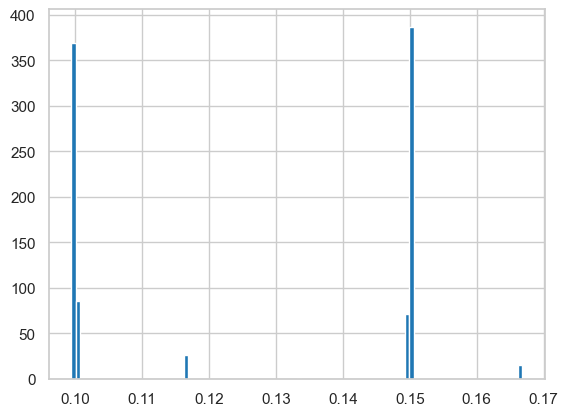

In [72]:
df_sensor['timestamp_diff'].hist(bins=100)

In [73]:
df_sensor.tail()

,timestamp,value,timestamp_diff
1002,2764.582846,A,0.150071
1003,2764.699423,a,0.116577
1004,2764.849657,A,0.150234
1005,2764.949554,a,0.099897
1006,2765.099603,A,0.150050


In [74]:
df_lsl.tail()

,timestamp,value,timestamp_diff
994,2764.541573,A,0.150609
995,2764.642283,a,0.100709
996,2764.792894,A,0.150611
997,2764.893588,a,0.100694
998,2765.044185,A,0.150598


<Axes: ylabel='Count'>

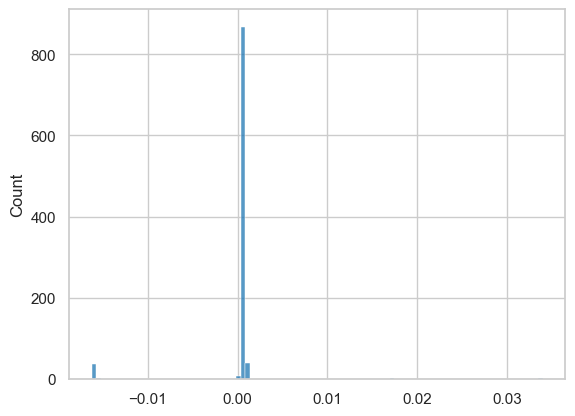

In [75]:
delays = df_lsl['timestamp_diff'].to_numpy() - df_sensor['timestamp_diff'].to_numpy() 
sns.histplot(delays, bins=100)

In [ ]:
import pyxdf



: 

In [45]:
import pylsl

sequence_stream = pylsl.resolve_byprop('name', 'SequenceStream', timeout=0.0)[0]
sequence_stream = pylsl.StreamInlet(sequence_stream)

sequence_stream.pull_sample(timeout=0.0)

IndexError: list index out of range

In [8]:
sequence_stream.pull_sample(timeout=0.0)

([1, 1, 1, 1, 1, 1, 1, 1], 13091.1935125)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

In [47]:
fpath = '.\sub-P001_ses-S001_task-vsyncsensor_test_run-001_eeg.xdf'
fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg_old7.xdf"
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])

['SequenceStream']
['ScreenSequenceStream']
['ScreenSensorStream']


In [49]:
streams

[{'info': defaultdict(list,
              {'name': ['SequenceStream'],
               'type': ['Marker'],
               'channel_count': ['8'],
               'channel_format': ['int8'],
               'source_id': ['-3777632379647347893'],
               'nominal_srate': ['0.000000000000000'],
               'version': ['1.100000000000000'],
               'created_at': ['7862.463293400000'],
               'uid': ['2d3a100d-06ca-41d9-b70b-b880f08385d7'],
               'session_id': ['default'],
               'hostname': ['2010dcc-eeg-040'],
               'v4address': [None],
               'v4data_port': ['16572'],
               'v4service_port': ['16572'],
               'v6address': [None],
               'v6data_port': ['16572'],
               'v6service_port': ['16572'],
               'desc': [None],
               'stream_id': 1,
               'effective_srate': 0,
               'segments': []}),
  'footer': {'info': defaultdict(list,
               {'first_timestamp': 

In [21]:
# Get sequence stream by name
sequence_stream = [s for s in streams if s['info']['name'][0] == 'SequenceStream'][0]
screen_sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]

## Sequence jitter

In [22]:
timestamps = sequence_stream['time_stamps']
timestamps_diff = np.diff(timestamps)

In [23]:
timestamps_diff

array([0.01695231, 0.01694471, 0.01698461, ..., 0.01693911, 0.01697371,
       0.01695111], shape=(1386,))

In [26]:
on_timestamps_diff = timestamps_diff[timestamps_diff < 0.13] - 1 / 60
off_timestamps_diff = timestamps_diff[timestamps_diff > 0.13] - 1 / 60
delays = np.concatenate((on_timestamps_diff, off_timestamps_diff))
print(delays.shape)

(1386,)


In [31]:
1 / 120

0.008333333333333333

(0.25, 0.35)

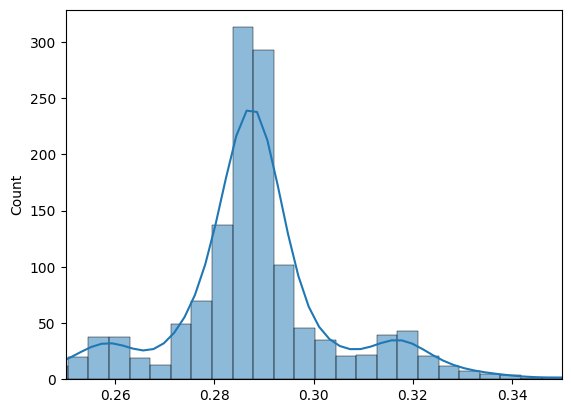

In [36]:
sns.histplot(delays * 1000, bins=100, kde=True)
plt.xlim(0.25, 0.35)

In [35]:
# 0.03 ms to hz
1 / 0.03

33.333333333333336

# Sensor jitter

In [37]:
timestamps = sensor_stream['time_stamps']
timeseries = sensor_stream['time_series']
timestamps_diff = np.diff(timestamps)

In [38]:
timestamps_diff

array([0.0157651 , 0.02593159, 0.0156931 , ..., 0.0157457 , 0.0174229 ,
       0.0157479 ], shape=(1001,))

In [39]:
np.histogram(timestamps_diff)

(array([  4,   0,   0,   0,   0,  48, 948,   0,   0,   1]),
 array([0.000213  , 0.00278486, 0.00535672, 0.00792858, 0.01050044,
        0.0130723 , 0.01564416, 0.01821601, 0.02078787, 0.02335973,
        0.02593159]))

In [40]:
# Remove first 10 and last 10 samples
timestamps_diff = timestamps_diff[10:-10]

<Axes: ylabel='Count'>

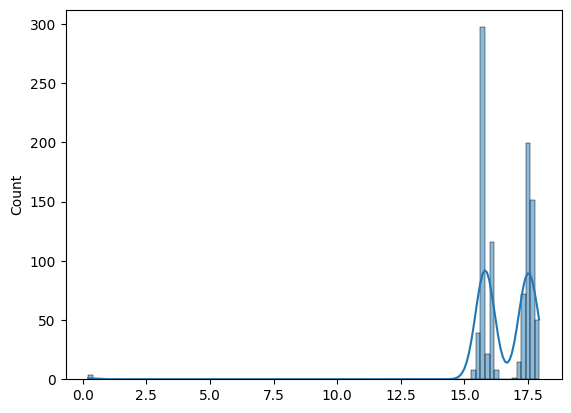

In [42]:
sns.histplot(timestamps_diff * 1000, bins=100, kde=True)

In [44]:
1 / 120 * 1000

8.333333333333334

In [1]:
import pyglet
from ctypes import c_int, byref

max_samples = c_int()
pyglet.gl.glGetIntegerv(pyglet.gl.GL_MAX_SAMPLES, byref(max_samples))

print(f"maximum samples: {max_samples.value}")

maximum samples: 64
